### Importing Necessary Libraries

In [177]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

### Loading and Viewing the Dataset

In [178]:
df = pd.read_csv('dataset/Electric_Vehicle_Population_Data.csv',encoding='cp1252')
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,NaN,198968248,POINT (-81.80023 24.5545),NaN,12087972100
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,NaN,5204412,POINT (-114.57245 35.16815),NaN,32003005702
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500


# Data Cleaning and Pre-processing

### Describing the Dataset

In [179]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,112634.000000,112634.000000,112634.000000,112634.000000,112348.000000,1.126340e+05,1.126340e+05
mean,98156.226850,2019.003365,87.812987,1793.439681,29.805604,1.994567e+08,5.296650e+10
std,2648.733064,2.892364,102.334216,10783.753486,14.700545,9.398427e+07,1.699104e+09
min,1730.000000,1997.000000,0.000000,0.000000,1.000000,4.777000e+03,1.101001e+09
25%,98052.000000,2017.000000,0.000000,0.000000,18.000000,1.484142e+08,5.303301e+10
50%,98119.000000,2020.000000,32.000000,0.000000,34.000000,1.923896e+08,5.303303e+10
75%,98370.000000,2022.000000,208.000000,0.000000,43.000000,2.191899e+08,5.305307e+10
max,99701.000000,2023.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


In [180]:
df.shape

(112634, 17)

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         112634 non-null  object 
 1   County                                             112634 non-null  object 
 2   City                                               112634 non-null  object 
 3   State                                              112634 non-null  object 
 4   Postal Code                                        112634 non-null  int64  
 5   Model Year                                         112634 non-null  int64  
 6   Make                                               112634 non-null  object 
 7   Model                                              112614 non-null  object 
 8   Electric Vehicle Type                              112634 non-null  object

### Checking for missing/NaN values

In [182]:
df.isnull().sum()

VIN (1-10)                                             0
County                                                 0
City                                                   0
State                                                  0
Postal Code                                            0
Model Year                                             0
Make                                                   0
Model                                                 20
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 286
DOL Vehicle ID                                         0
Vehicle Location                                      24
Electric Utility                                     443
2020 Census Tract                                      0
dtype: int64

### Dropping the missing/NaN values, since they will have no significant impact on the model

In [183]:
df = df.dropna()

### No missing/NaN values remaining

In [184]:
df.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

In [185]:
df.head(3)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500


# Exploratory Data Analysis

### Displaying top 10 Counties

In [186]:
Counties = df.groupby('County').count().sort_values(by='City',ascending=False)['City'].index
values = df.groupby('County').count().sort_values(by='City',ascending=False)['City'].values

px.bar(x=list(Counties)[:10],y=values[:10],labels={'x':"County Name",'y':"Number of Cars"},color=values[:10])

### Displaying top Companies which makes EVs

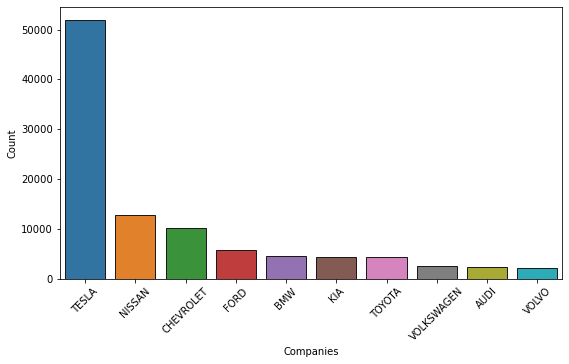

In [187]:
Companies = df.groupby('Make').count().sort_values(by='City',ascending=False)['City'].index
values = df.groupby('Make').count().sort_values(by='City',ascending=False)['City'].values


plt.figure(figsize=(9,5))
sns.barplot(x=list(Companies)[:10],y=values[:10],edgecolor='.1')
plt.xticks(rotation='45')
plt.xlabel('Companies')
plt.ylabel('Count')
plt.show()

### Disaplying most sold EV models

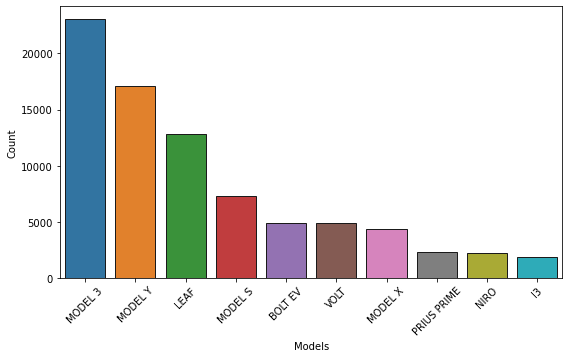

In [188]:
Models = df.groupby('Model').count().sort_values(by='City',ascending=False)['City'].index
values = df.groupby('Model').count().sort_values(by='City',ascending=False)['City'].values


plt.figure(figsize=(9,5))
sns.barplot(x=list(Models)[:10],y=values[:10],edgecolor='.1')
plt.xticks(rotation='45')
plt.xlabel('Models')
plt.ylabel('Count')
plt.show()

### Displaying EV companies top sold model

In [189]:
top_10_companies = list(Companies)[:10]
print("Company \tTop selling Model")
for i in top_10_companies:
    data = df[df['Make']==i]
    data = data.groupby('Model').count().sort_values(by='City',ascending=False).index
    #print('Top selling model for',i,'is ----------->',data[0])
    print("{}\t\t{}".format(i,data[0]))

Company 	Top selling Model
TESLA		MODEL 3
NISSAN		LEAF
CHEVROLET		BOLT EV
FORD		FUSION
BMW		I3
KIA		NIRO
TOYOTA		PRIUS PRIME
VOLKSWAGEN		ID.4
AUDI		E-TRON
VOLVO		XC90


In [190]:
df['Make'].unique()

array(['NISSAN', 'CHEVROLET', 'FORD', 'TESLA', 'KIA', 'AUDI', 'BMW',
       'PORSCHE', 'FIAT', 'CADILLAC', 'MITSUBISHI', 'CHRYSLER', 'RIVIAN',
       'HONDA', 'HYUNDAI', 'VOLVO', 'VOLKSWAGEN', 'TOYOTA',
       'MERCEDES-BENZ', 'JEEP', 'MINI', 'SMART', 'SUBARU', 'POLESTAR',
       'LUCID MOTORS', 'LINCOLN', 'JAGUAR', 'FISKER', 'LAND ROVER',
       'LEXUS', 'TH!NK', 'GENESIS', 'BENTLEY', 'AZURE DYNAMICS'],
      dtype=object)

In [191]:
from plotly import __version__
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

### Pie-chart showing the distribution of BEV vs PHEV

In [192]:
Vehicle_type = list(df.groupby('Electric Vehicle Type').count()['County'].index)
values = df.groupby('Electric Vehicle Type').count()['County'].values

px.pie(names=Vehicle_type,values=values,height=500)

### Number of models sold by each company in last 10 years

<AxesSubplot:xlabel='Model Year', ylabel='count'>

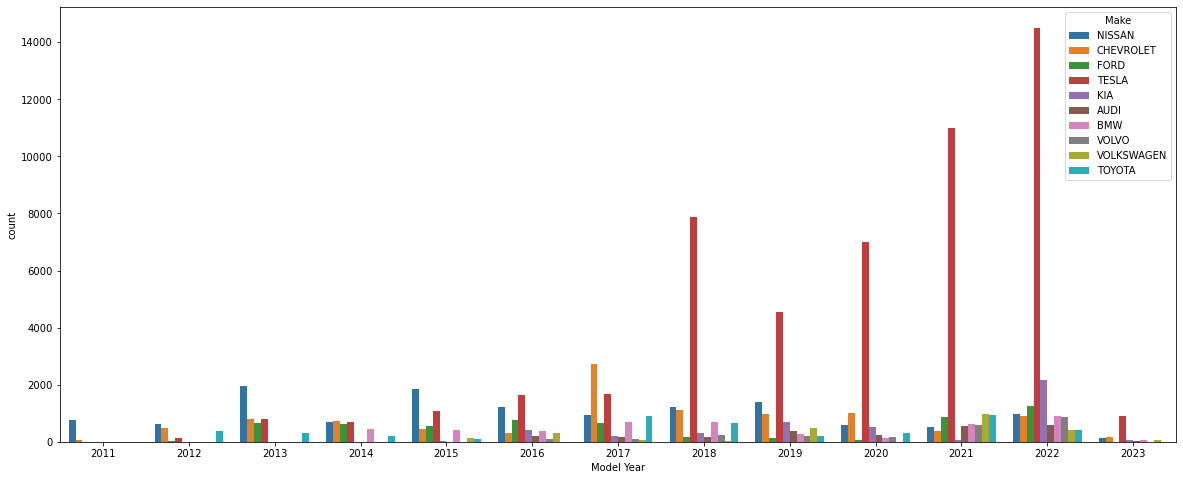

In [193]:
data = df.copy()
data['top_10'] = data['Make'].apply(lambda x:1 if x in top_10_companies else 0)
data = data[data['top_10']==1]
data = data[data['Model Year']>=2011]
plt.figure(figsize=(20,8))
sns.countplot(x = 'Model Year',hue='Make',data=data)

# Machine Learning Modeling

In [194]:
df.sort_values('Electric Range', ascending=False).head(3)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
11828,5YJSA1E44L,Clark,Vancouver,WA,98684,2020,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,337,0,17.0,131590462,POINT (-122.5476 45.62832),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,53011041322
89904,5YJSA1E44L,Spokane,Spokane,WA,99203,2020,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,337,0,3.0,131439955,POINT (-117.39322 47.63374),MODERN ELECTRIC WATER COMPANY,53063004500
28913,5YJSA1E43L,Snohomish,Lake Stevens,WA,98258,2020,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,337,0,44.0,110724344,POINT (-122.06402 48.01497),PUGET SOUND ENERGY INC,53061052604


In [195]:
df['VIN (1-10)'].unique()
df = df.drop('VIN (1-10)', axis =1)

In [196]:
df['State'].unique()
df = df.drop('State', axis=1)

In [197]:
df['County'].value_counts()

King            58980
Snohomish       12412
Pierce           8525
Clark            6681
Thurston         4109
Kitsap           3828
Whatcom          2839
Spokane          2785
Benton           1376
Island           1298
Skagit           1228
Clallam           728
San Juan          717
Jefferson         698
Chelan            654
Yakima            617
Cowlitz           569
Mason             547
Lewis             431
Grays Harbor      402
Kittitas          392
Franklin          365
Grant             335
Walla Walla       312
Douglas           221
Whitman           177
Klickitat         175
Okanogan          149
Pacific           145
Skamania          139
Stevens            91
Asotin             48
Wahkiakum          39
Adams              34
Pend Oreille       32
Lincoln            30
Ferry              27
Columbia           13
Garfield            4
Name: County, dtype: int64

In [198]:
df['County']= df['County'].replace(['Clallam','San Juan','Cowlitz','Mason','Lewis','Grays Harbor',
                      'Kittitas','Franklin','Grant','Walla Walla','Douglas','Whitman',
                      'Klickitat','Okanogan','Pacific','Skamania','Stevens','Asotin',
                      'Wahkiakum','Adams','Pend Oreille','Lincoln','Ferry','Columbia','Garfield'],'Others')

In [199]:
df['City']=df['City'].replace(df['City'].value_counts().iloc[25:].index.tolist(),'Others')

In [200]:
df['Electric Vehicle Type'].unique()

dummies = pd.get_dummies(df['Electric Vehicle Type'], drop_first=True)
df = pd.concat([df.drop('Electric Vehicle Type', axis=1), dummies], axis=1)

In [201]:
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].unique()

array(['Clean Alternative Fuel Vehicle Eligible',
       'Not eligible due to low battery range',
       'Eligibility unknown as battery range has not been researched'],
      dtype=object)

In [202]:
dummies = pd.get_dummies(df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'], drop_first=True)
df = pd.concat([df.drop('Clean Alternative Fuel Vehicle (CAFV) Eligibility', axis = 1), dummies], axis=1)

In [203]:
df.select_dtypes('object')

,County,City,Make,Model,Vehicle Location,Electric Utility
2,Yakima,Others,NISSAN,LEAF,POINT (-120.50721 46.60448),PACIFICORP
3,Skagit,Others,CHEVROLET,BOLT EV,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC
4,Snohomish,Everett,FORD,FUSION,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC
5,Snohomish,Bothell,TESLA,MODEL 3,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC
6,Snohomish,Everett,NISSAN,LEAF,POINT (-122.23019 47.94949),PUGET SOUND ENERGY INC
...,...,...,...,...,...,...
112629,King,Others,TESLA,MODEL Y,POINT (-121.98609 47.74068),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
112630,Others,Others,NISSAN,LEAF,POINT (-123.01648 48.53448),BONNEVILLE POWER ADMINISTRATION||ORCAS POWER &...
112631,King,Others,FORD,ESCAPE,POINT (-122.4573 47.44929),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
112632,King,Others,KIA,NIRO,POINT (-122.09124 47.33778),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)


In [204]:
df['Vehicle Location'].unique()

array(['POINT (-120.50721 46.60448)', 'POINT (-121.7515 48.53892)',
       'POINT (-122.20596 47.97659)', 'POINT (-122.18384 47.8031)',
       'POINT (-122.23019 47.94949)', 'POINT (-122.29196 47.89908)',
       'POINT (-122.35803 47.9796)', 'POINT (-122.61214 48.51748)',
       'POINT (-122.75379 47.06316)', 'POINT (-119.2771 47.13196)',
       'POINT (-123.08743 46.82175)', 'POINT (-122.33029 48.46846)',
       'POINT (-122.19388 48.15353)', 'POINT (-122.27734 47.83785)',
       'POINT (-122.31768 47.87166)', 'POINT (-122.92333 47.03779)',
       'POINT (-122.27981 47.85727)', 'POINT (-122.3026 47.72656)',
       'POINT (-122.23035 47.3074)', 'POINT (-122.31765 47.70013)',
       'POINT (-122.37689 47.81116)', 'POINT (-122.40618 48.0399)',
       'POINT (-122.82324 47.04437)', 'POINT (-122.89166 47.03956)',
       'POINT (-122.18637 47.89252)', 'POINT (-122.1389 47.87115)',
       'POINT (-122.66122 47.56573)', 'POINT (-122.29245 47.82557)',
       'POINT (-122.25527 47.90456)', 'POI

In [205]:
df['lat']=df['Vehicle Location'].apply(lambda x:x.split('(')[1].split(')')[0].split(' ')[0])
df['lon']=df['Vehicle Location'].apply(lambda x:x.split('(')[1].split(')')[0].split(' ')[1])

In [206]:
df['lon'] = df['lon'].astype(float)
df['lat'] = df['lat'].astype(float)

In [207]:
df['lon']=df['lon'].astype(int)
df['lat'] = df['lat'].astype(int)

In [208]:
df = df.drop('Vehicle Location', axis =1 )

In [209]:
df.select_dtypes('object')

,County,City,Make,Model,Electric Utility
2,Yakima,Others,NISSAN,LEAF,PACIFICORP
3,Skagit,Others,CHEVROLET,BOLT EV,PUGET SOUND ENERGY INC
4,Snohomish,Everett,FORD,FUSION,PUGET SOUND ENERGY INC
5,Snohomish,Bothell,TESLA,MODEL 3,PUGET SOUND ENERGY INC
6,Snohomish,Everett,NISSAN,LEAF,PUGET SOUND ENERGY INC
...,...,...,...,...,...
112629,King,Others,TESLA,MODEL Y,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
112630,Others,Others,NISSAN,LEAF,BONNEVILLE POWER ADMINISTRATION||ORCAS POWER &...
112631,King,Others,FORD,ESCAPE,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
112632,King,Others,KIA,NIRO,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)


In [210]:
dummies = pd.get_dummies(df['County'], drop_first=True)
df = pd.concat([df.drop('County', axis = 1), dummies], axis=1)

In [211]:
dummies = pd.get_dummies(df['City'], drop_first=True)
df = pd.concat([df.drop('City', axis = 1), dummies], axis=1)

In [212]:
df

,Postal Code,Model Year,Make,Model,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Electric Utility,2020 Census Tract,...,Redmond,Renton,Sammamish,Seattle,Shoreline,Snohomish,Spokane,Tacoma,Vancouver,Woodinville
2,98901,2011,NISSAN,LEAF,73,0,15.0,218972519,PACIFICORP,53077001602,...,0,0,0,0,0,0,0,0,0,0
3,98237,2017,CHEVROLET,BOLT EV,238,0,39.0,186750406,PUGET SOUND ENERGY INC,53057951101,...,0,0,0,0,0,0,0,0,0,0
4,98201,2019,FORD,FUSION,26,0,38.0,2006714,PUGET SOUND ENERGY INC,53061041500,...,0,0,0,0,0,0,0,0,0,0
5,98021,2018,TESLA,MODEL 3,215,0,1.0,475635324,PUGET SOUND ENERGY INC,53061051916,...,0,0,0,0,0,0,0,0,0,0
6,98203,2013,NISSAN,LEAF,75,0,38.0,253546023,PUGET SOUND ENERGY INC,53061040900,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112629,98019,2022,TESLA,MODEL Y,0,0,45.0,217955265,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033032401,...,0,0,0,0,0,0,0,0,0,0
112630,98250,2019,NISSAN,LEAF,150,0,40.0,103663227,BONNEVILLE POWER ADMINISTRATION||ORCAS POWER &...,53055960301,...,0,0,0,0,0,0,0,0,0,0
112631,98070,2022,FORD,ESCAPE,38,0,34.0,193878387,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033027702,...,0,0,0,0,0,0,0,0,0,0
112632,98042,2018,KIA,NIRO,26,0,47.0,125039043,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033032007,...,0,0,0,0,0,0,0,0,0,0


In [213]:
df.select_dtypes('object')

,Make,Model,Electric Utility
2,NISSAN,LEAF,PACIFICORP
3,CHEVROLET,BOLT EV,PUGET SOUND ENERGY INC
4,FORD,FUSION,PUGET SOUND ENERGY INC
5,TESLA,MODEL 3,PUGET SOUND ENERGY INC
6,NISSAN,LEAF,PUGET SOUND ENERGY INC
...,...,...,...
112629,TESLA,MODEL Y,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
112630,NISSAN,LEAF,BONNEVILLE POWER ADMINISTRATION||ORCAS POWER &...
112631,FORD,ESCAPE,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
112632,KIA,NIRO,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)


In [214]:
df = df.drop('Electric Utility', axis=1)

### Train-Test split

In [215]:
from sklearn.model_selection import train_test_split

In [216]:
X = df.drop(['Make', 'Model'], axis = 1).values

In [217]:
y= df[['Make', 'Model']].values

In [218]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

### Creating Decision Tree Classifier Model

In [219]:
from sklearn.tree import DecisionTreeClassifier

In [220]:
dtree=DecisionTreeClassifier()

In [221]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

### Predicting our Model with 'X_test'

In [222]:
predictions = dtree.predict(X_test)

In [223]:
print(predictions.shape)

(33646, 2)


In [224]:
print(predictions)

[['TESLA' 'MODEL X']
 ['POLESTAR' 'PS2']
 ['CHEVROLET' 'BOLT EV']
 ...
 ['TESLA' 'MODEL 3']
 ['TESLA' 'MODEL 3']
 ['VOLVO' 'C40']]


In [225]:
df.drop(df.iloc[:, 14::], inplace=True, axis=1)

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112152 entries, 2 to 112633
Data columns (total 14 columns):
 #   Column                                                        Non-Null Count   Dtype  
---  ------                                                        --------------   -----  
 0   Postal Code                                                   112152 non-null  int64  
 1   Model Year                                                    112152 non-null  int64  
 2   Make                                                          112152 non-null  object 
 3   Model                                                         112152 non-null  object 
 4   Electric Range                                                112152 non-null  int64  
 5   Base MSRP                                                     112152 non-null  int64  
 6   Legislative District                                          112152 non-null  float64
 7   DOL Vehicle ID                                          

### Describing Segments

In [227]:
dist = df.groupby(['Legislative District', 'Model','Electric Range'])
dist.first()

Postal Code  Model Year   Make  \
Legislative District Model Electric Range                                   
1.0                  330E  14                    98011        2017    BMW   
                           20                    98011        2021    BMW   
                           22                    98034        2022    BMW   
                     500   84                    98011        2018   FIAT   
                           87                    98034        2014   FIAT   
...                                                ...         ...    ...   
49.0                 X5    30                    98663        2021    BMW   
                     XC40  0                     98661        2021  VOLVO   
                     XC60  17                    98664        2018  VOLVO   
                           18                    98664        2021  VOLVO   
                     XC90  18                    98660        2021  VOLVO   

                                           Base MSRP  DOL Vehicle ID  \
Legislative District Model Electric Range                              
1.0                  330E  14                  44100       177758332   
                           20                      0       177595722   
                           22                      0       212010228   
                     500   84                      0       179545229   
                           87                      0       165477105   
...                                              ...             ...   
49.0                 X5    30                      0       128762497   
                     XC40  0                       0       195250289   
                     XC60  17                  52900       169502154   
                           18                      0       176274402   
                     XC90  18                      0       152599170   

                                           2020 Census Tract  \
Legislative District Model Electric Range                      
1.0                  330E  14                    53033021804   
                           20                    53033022001   
                           22                    53033022203   
                     500   84                    53033021803   
                           87                    53033022300   
...                                                      ...   
49.0                 X5    30                    53011041011   
                     XC40  0                     53011042601   
                     XC60  17                    53011043100   
                           18                    53011041208   
                     XC90  18                    53011042000   

                                           Plug-in Hybrid Electric Vehicle (PHEV)  \
Legislative District Model Electric Range                                           
1.0                  330E  14                                                   1   
                           20                                                   1   
                           22                                                   1   
                     500   84                                                   0   
                           87                                                   0   
...                                                                           ...   
49.0                 X5    30                                                   1   
                     XC40  0                                                    0   
                     XC60  17                                                   1   
                           18                                                   1   
                     XC90  18                                                   1   

                                           Eligibility unknown as battery range has not been researched  \
Legislative District Model Electric Range                 

In [228]:
df

,Postal Code,Model Year,Make,Model,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract,Plug-in Hybrid Electric Vehicle (PHEV),Eligibility unknown as battery range has not been researched,Not eligible due to low battery range,lat,lon
2,98901,2011,NISSAN,LEAF,73,0,15.0,218972519,53077001602,0,0,0,-120,46
3,98237,2017,CHEVROLET,BOLT EV,238,0,39.0,186750406,53057951101,0,0,0,-121,48
4,98201,2019,FORD,FUSION,26,0,38.0,2006714,53061041500,1,0,1,-122,47
5,98021,2018,TESLA,MODEL 3,215,0,1.0,475635324,53061051916,0,0,0,-122,47
6,98203,2013,NISSAN,LEAF,75,0,38.0,253546023,53061040900,0,0,0,-122,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112629,98019,2022,TESLA,MODEL Y,0,0,45.0,217955265,53033032401,0,1,0,-121,47
112630,98250,2019,NISSAN,LEAF,150,0,40.0,103663227,53055960301,0,0,0,-123,48
112631,98070,2022,FORD,ESCAPE,38,0,34.0,193878387,53033027702,1,0,0,-122,47
112632,98042,2018,KIA,NIRO,26,0,47.0,125039043,53033032007,1,0,1,-122,47


In [229]:
Make_v = df.groupby('Make').count().sort_values(by='Electric Range',ascending=False)['Electric Range'].values
Make_i = df.groupby('Make').count().sort_values(by='Electric Range',ascending=False)['Electric Range'].index
Make_v

array([51883, 12846, 10140,  5780,  4660,  4469,  4368,  2507,  2320,
        2256,  1780,  1407,  1143,   883,   820,   817,   788,   631,
         585,   557,   503,   271,   218,   167,   108,    65,    59,
          38,    33,    19,    18,     7,     3,     3], dtype=int64)

In [230]:
Model = df.groupby('Model').count().sort_values(by='Electric Range',ascending=False)['Electric Range'].index
BMRP = df.groupby('Model').count().sort_values(by='Base MSRP',ascending=False)['Base MSRP'].values

px.bar(x=list(Model)[:10],y=BMRP[:10],labels={'x':"Model Name",'y':"Models Sold"})

**From the Bar-graph above we can say that the EV comapany Tesla has sold the number of vehicles as compared to other brands**

In [231]:
Make_v = df.groupby('Make').count().sort_values(by='Base MSRP',ascending=False)['Base MSRP'].values
Make_i = df.groupby('Make').count().sort_values(by='Base MSRP',ascending=False)['Base MSRP'].index
Make_v

array([51883, 12846, 10140,  5780,  4660,  4469,  4368,  2507,  2320,
        2256,  1780,  1407,  1143,   883,   820,   817,   788,   631,
         585,   557,   503,   271,   218,   167,   108,    65,    59,
          38,    33,    19,    18,     7,     3,     3], dtype=int64)

In [232]:
test_i = df.groupby('Make').mean().sort_values(by='Electric Range',ascending=False)['Electric Range'].index
test_v = df.groupby('Make').mean().sort_values(by='Electric Range',ascending=False)['Electric Range'].values

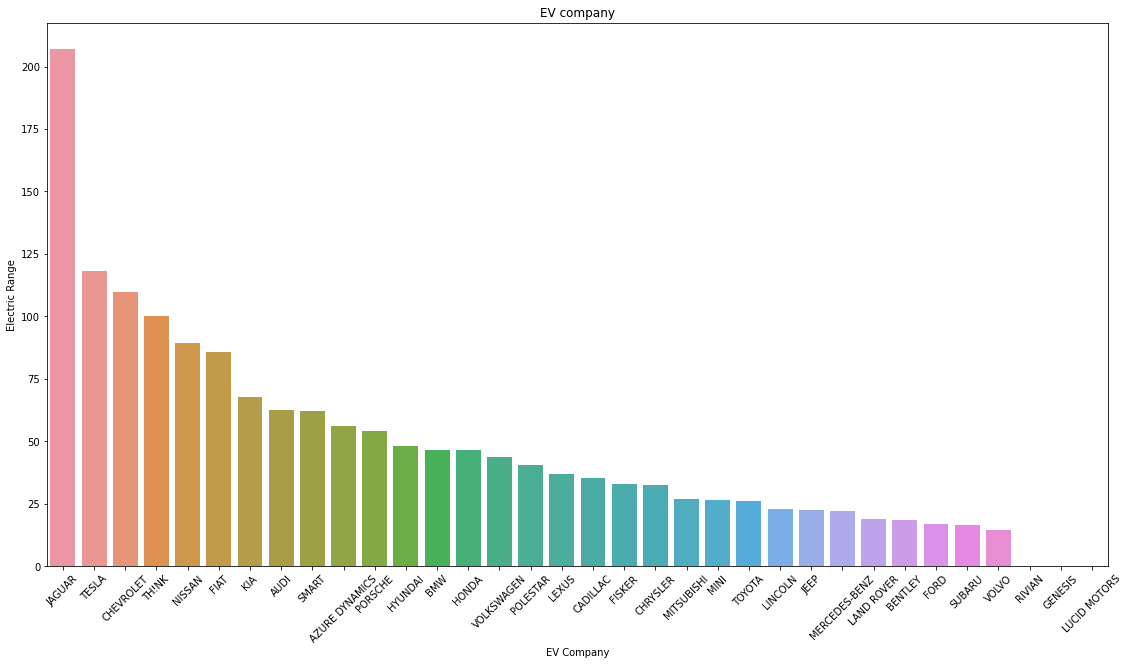

In [233]:
plt.figure(figsize=(19,10))
sns.barplot(y=test_v , x=test_i, data=df)
plt.xlabel('EV Company')
plt.ylabel('Electric Range')
plt.title('EV company')
plt.xticks(rotation=45)
plt.show()

**From the bar graph above, we can say that the EV model made by Jaguar has the highest Electric range, followed by Tesla**

### Conclusion
1. Most of the EVs were sold by Tesla even though they had less electric range as compared to Jaguar.
2. Customers will buy EV according to the average price and average electric range.
3. Tesla's Model 3 was the most successful EV model as compared to other models from different EV companies.